In [7]:
import matplotlib.pyplot as plt
import numpy as np

import sympy
from sympy import symbols
from sympy import lambdify
from sympy import latex
from sympy import solve
from sympy import Eq

#%config InlineBackend.figure_format='retina'

x = symbols('x');

def build_cost(slope, inter=0):
    """ Create the total cost curve.
    
    Returns a sympy equation.
    """
    m, x, b = symbols('m x b')
    COST = m*x**2 + b
    return COST.subs(m, slope).subs(b, inter)


def convert_title(title):
    """ Convert a sympy latex string for
    use in matplotlib
    """
    return "$" + title + "$"

The cost curves are equal at -3
With a use each days, it would take -3 days in order to make money.


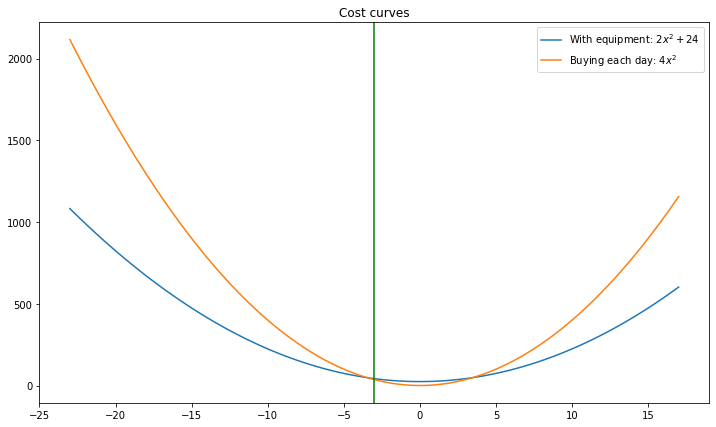

In [8]:
fixed = build_cost(slope=2, inter=24)
variable = build_cost(slope=4)

# Get where they're equal
EQ = int(solve(Eq(fixed, variable))[0])
FREQ = 'days'

print(f'The cost curves are equal at {EQ}')
print(f'With a use each {FREQ}, it would take {EQ} {FREQ} in order to make money.')

lam_a = lambdify(x, fixed, modules=['numpy'])
lam_b = lambdify(x, variable, modules=['numpy'])

BUF = 20  # Before and after equal
x_vals = np.linspace(EQ-BUF, EQ+BUF, 100)
y_vals1 = lam_a(x_vals)
y_vals2 = lam_b(x_vals)

plt.plot(x_vals, y_vals1, label='With equipment: '  + convert_title(latex(fixed)));
plt.plot(x_vals, y_vals2, label='Buying each day: ' + convert_title(latex(variable)));

plt.axvline(x=EQ, color='green');

plt.title('Cost curves');
plt.legend();
plt.gcf().set_figwidth(12);
plt.gcf().set_figheight(7);

### User input

- Frequency units (day, week, month)
- Frequency of use (number: 1, 2, 3) times per frequency unit
- Cost per unit (no capital)
- Cost per unit (with capital)

### Output

- How many frequency units until they're making money?
- \[Yes / No\] will you save money if you use this once a day for 500 days?

In [6]:
from bokeh.plotting import figure, output_file, show, output_notebook

# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]

# output to static HTML file
# output_file("log_lines.html")
output_notebook()

# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

# add some renderers
p.line(x, x, legend_label="y=x")
p.circle(x, x, legend_label="y=x", fill_color="white", size=8)
p.line(x, y0, legend_label="y=x^2", line_width=3)
p.line(x, y1, legend_label="y=10^x", line_color="red")
p.circle(x, y1, legend_label="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend_label="y=10^x^2", line_color="orange", line_dash="4 4")

# show the results
show(p)

Loading BokehJS ...